# import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [ ]:
csv= "C:\\Users\\Joao\\analise de dados\\daily_trending_videos.csv"
df = pd.read_csv(csv, sep=";", encoding="latin1")

In [ ]:
df['video_id'] = df['video_id'].astype('string')
df['title'] = df['title'].astype('string')
df['channel'] = df['channel'].astype('string')
df['country'] = df['country'].astype('category')
df['views'] = pd.to_numeric(df['views'], errors='coerce').astype('Int64')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce').astype('Int64')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce').astype('Int64')
df['published_at'] = pd.to_datetime(df['published_at'], utc=True, errors='coerce')
df['fetch_date'] = pd.to_datetime(df['fetch_date'], format='%d/%m/%Y %H:%M', errors='coerce')

In [ ]:
df.set_index('video_id', inplace=True)

Existe algum valor faltando?

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.figure()

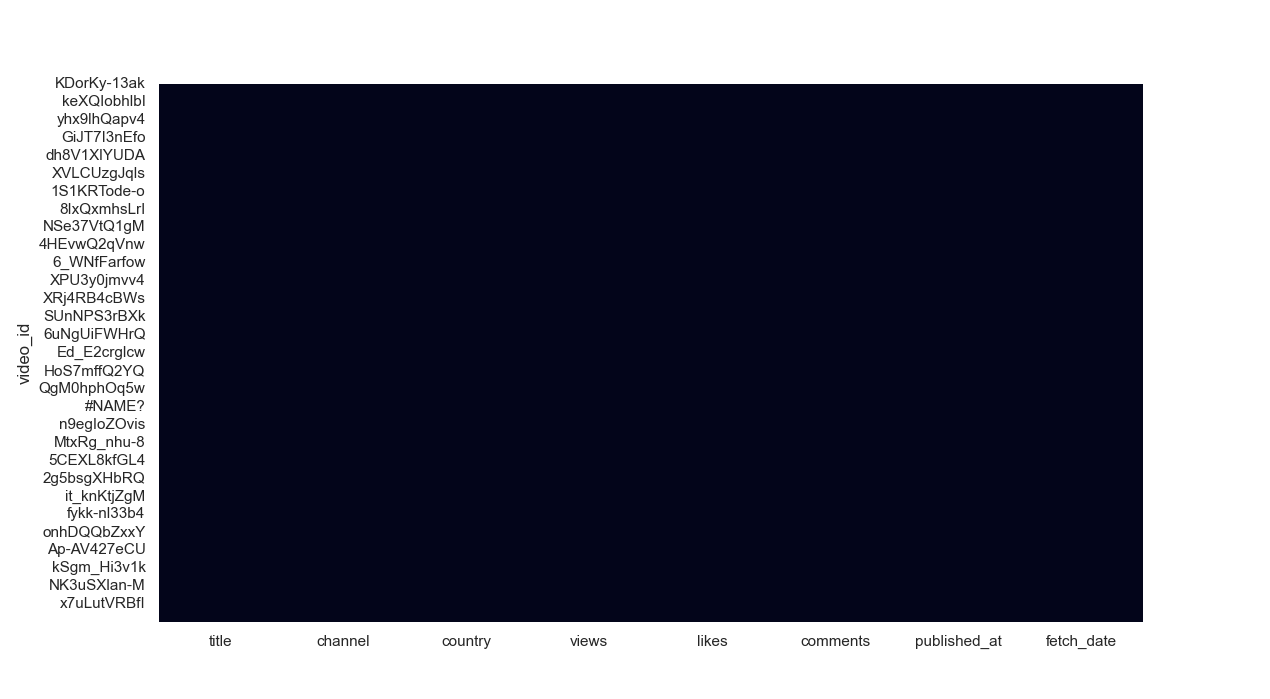

In [ ]:
df_br = df[df['country'] == 'BR']

In [ ]:
views_por_canal = (df_br.groupby('channel')['views'].sum().sort_values(ascending=False))
views_por_canal.head(10).plot(kind='barh',figsize=(10, 6))
plt.title('Top 10 canais com mais visualizações no Brasil')
plt.xlabel('Total de visualizações')
plt.ylabel('Canal')
plt.gca().invert_yaxis()
plt.show()

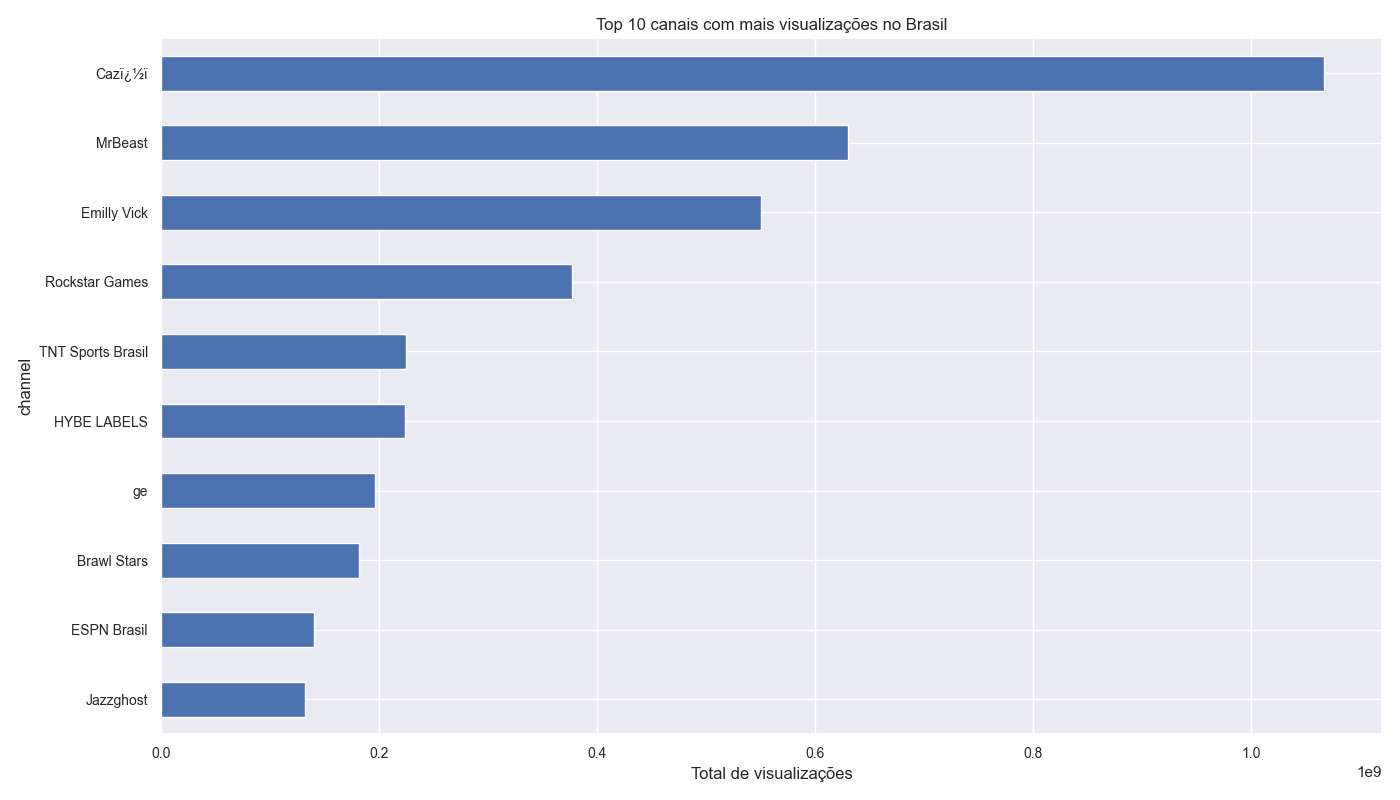

Quais canais no Brasil têm mais likes?

In [ ]:
likes_por_canal = (df_br.groupby('channel')['likes'].sum().sort_values(ascending=False))
likes_por_canal.head(10).plot(kind='barh',figsize=(10, 6))
plt.title('Top 10 canais com mais likes do Brasil')
plt.xlabel('Total de likes')
plt.ylabel('Canal')
plt.gca().invert_yaxis()
plt.show()

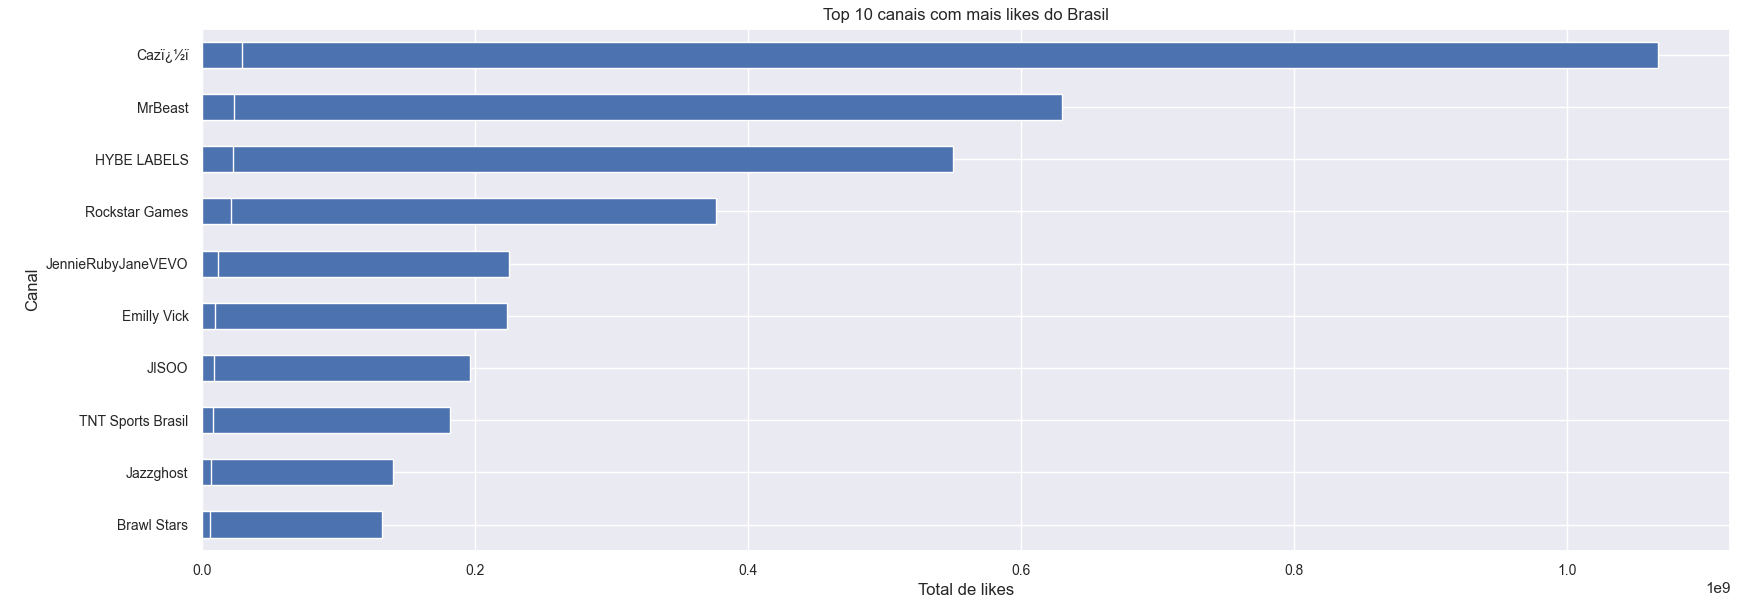

Qual a correlação de engajamento com os parâmetros likes vs views?

In [ ]:
df.plot.scatter(x='views', y='likes', alpha=0.5)
plt.title('Likes vs Views')
plt.show()

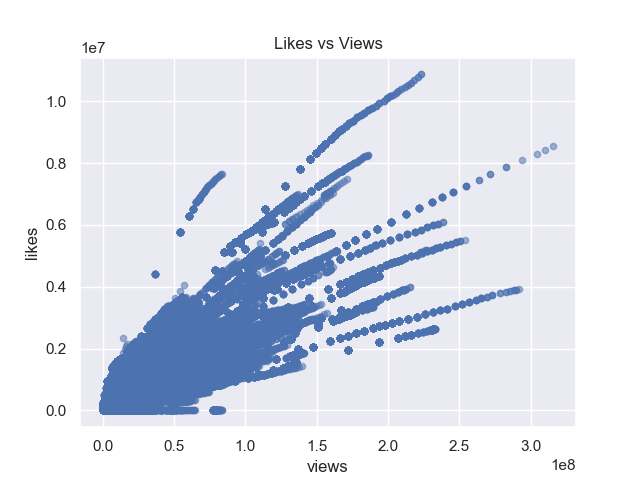

E no Brasil?

In [ ]:
df_br.plot.scatter(x='views', y='likes', alpha=0.5)
plt.title('Likes vs Views')
plt.show()

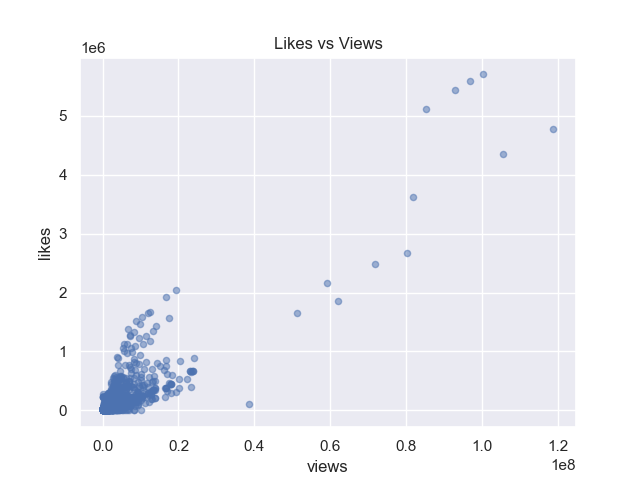